#           World Happiness Report

Problem tanımı ve amaç: Bu veri seti ilk kez 2012 yılında yayınlanan 155 ülkeyi mutluluk seviyelerine göre sıralayan dünya mutluluk raporlarından oluşmaktadır.

Mutluluk seviyelerini belirlemek için 6 faktör -ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik - göz önüne alınmaktadır. Amaç günümüz dünyasında daha mutlu toplumlar oluşmasına katkı sağlamak için aşağıdaki gibi sorulara cevaplar arayabilmektir.

Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?



In [586]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [587]:
data2015 = pd.read_csv("2015.csv")
data2016 = pd.read_csv("2016.csv")
data2017 = pd.read_csv("2017.csv")
data2018 = pd.read_csv("2018.csv")
data2019 = pd.read_csv("2019.csv")


In [588]:
data2015 = data2015.drop( columns= ['Happiness Rank','Standard Error','Dystopia Residual',"Family"])

data2015["Year"] = 2015

data2015_col = ['Country', 'Region', 'Happiness Score','GDP per Capita','Life Expectancy', 'Freedom',
                'Government Corruption','Generosity',"Year"]

data2015.columns = data2015_col

In [589]:
data2016 = data2016.drop( columns= ['Happiness Rank','Dystopia Residual','Lower Confidence Interval'
                                    , 'Upper Confidence Interval',"Family"])
data2016["Year"] = 2016
 
data2016_col = ['Country', 'Region', 'Happiness Score','GDP per Capita', 
                'Life Expectancy', 'Freedom','Government Corruption','Generosity',"Year"]

data2016.columns = data2016_col

In [590]:
data2017 = data2017.drop( columns= ['Happiness.Rank','Dystopia.Residual','Whisker.high','Whisker.low',"Family"])


data2017["Region"] = "N/A"
data2017["Year"] = 2017

data2017_col = ['Country','Happiness Score','GDP per Capita','Life Expectancy', 'Freedom',
                'Generosity','Government Corruption',"Region",'Year']
data2017.columns = data2017_col

In [591]:
data2018 = data2018.drop(columns= ['Overall rank'])

data2018["Region"] = "N/A"
data2018["Year"] = 2018

data2018_col = ['Country', 'Happiness Score', 'GDP per Capita','Social support', 'Life Expectancy','Freedom', 
                'Generosity','Government Corruption',"Region",'Year']

data2018.columns = data2018_col

In [592]:
data2019 = data2019.drop(columns= ['Overall rank'])

data2019["Region"] = "N/A"

data2019["Year"] = 2019

data2019_col = ['Country', 'Happiness Score', 'GDP per Capita','Social support', 'Life Expectancy','Freedom', 
                'Generosity','Government Corruption',"Region",'Year']

data2019.columns = data2019_col

In [593]:
order = ['Country', 'Region', 'Happiness Score','GDP per Capita','Life Expectancy', 'Freedom',
                'Government Corruption','Generosity',"Social support","Year"]

data2015 = data2015.reindex(columns=order)
data2016 = data2016.reindex(columns=order)
data2017 = data2017.reindex(columns=order)
data2018 = data2018.reindex(columns=order)
data2019 = data2019.reindex(columns=order)

In [594]:
alldata  = pd.concat([data2015,data2016,data2017,data2018,data2019])

In [595]:
alldata

,Country,Region,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year
0,Switzerland,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,NaN,2015
1,Iceland,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,NaN,2015
2,Denmark,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,NaN,2015
3,Norway,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,NaN,2015
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,N/A,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,0.711,2019
152,Tanzania,N/A,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,0.885,2019
153,Afghanistan,N/A,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,0.517,2019
154,Central African Republic,N/A,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,0.000,2019


In [596]:
alldata = alldata.dropna(subset = ["Social support"])

In [597]:
alldata.head()

,Country,Region,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year
0,Finland,N/A,7.632,1.305,0.874,0.681,0.393,0.202,1.592,2018
1,Norway,N/A,7.594,1.456,0.861,0.686,0.340,0.286,1.582,2018
2,Denmark,N/A,7.555,1.351,0.868,0.683,0.408,0.284,1.590,2018
3,Iceland,N/A,7.495,1.343,0.914,0.677,0.138,0.353,1.644,2018
4,Switzerland,N/A,7.487,1.420,0.927,0.660,0.357,0.256,1.549,2018


In [598]:
alldata.isnull().sum()

Country                  0
Region                   0
Happiness Score          0
GDP per Capita           0
Life Expectancy          0
Freedom                  0
Government Corruption    1
Generosity               0
Social support           0
Year                     0
dtype: int64

In [599]:
alldata = alldata.dropna(subset = ["Government Corruption"])

In [600]:
alldata.describe()

,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,5.387061,0.894447,0.661267,0.423987,0.111299,0.182916,1.212424,2018.501608
std,1.113653,0.389311,0.253131,0.156074,0.095365,0.096895,0.299774,0.500803
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,4.512500,0.608000,0.487500,0.325500,0.050000,0.108500,1.057000,2018.000000
50%,5.373000,0.960000,0.700000,0.450000,0.082000,0.175000,1.266000,2019.000000
75%,6.173500,1.214500,0.859000,0.540500,0.140500,0.245000,1.458000,2019.000000
max,7.769000,1.684000,1.141000,0.724000,0.457000,0.598000,1.644000,2019.000000


# Correlation Heatmap

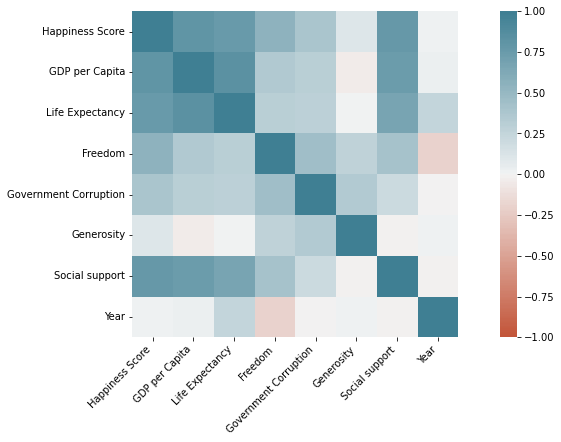

In [601]:
plt.figure(figsize = (15,6))
corr = alldata.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [602]:
pie1 = alldata["Happiness Score"][:10]
labels = alldata["Country"][:10]
fig = {
    "data" :[
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Score Of Countries or Region",
      "hoverinfo":"label+percent+name",
      "hole": .3,                                 
      "type": "pie"
    },],
  "layout": {
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Countries or Region rate of Score",
                "x": 0.135,
                "y": 1.1
            },
        ]
    } 
}
iplot(fig)

# 10 Most Happiest Country

[Text(0.5, 1.0, '10 Most Happiest Country')]

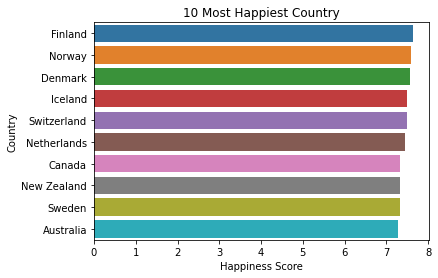

In [603]:
sns.barplot(y = alldata["Country"][:10], x = alldata["Happiness Score"][:10]).set(title='10 Most Happiest Country')

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

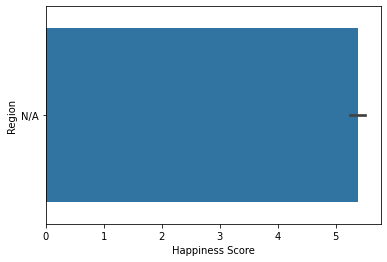

In [604]:
sns.barplot(y = alldata["Region"], x = alldata["Happiness Score"])

In [605]:
fig1 = px.scatter(alldata,x = "Happiness Score", y = "GDP per Capita", title = " HAPPINESS SCORE VS GDP PER CAPITA ")
fig1.show()


In [606]:
alldata1 = alldata[:5]


In [607]:

fig = px.line(alldata1, x='Country', y='Happiness Score')
fig.show()

In [608]:
value_count = alldata["Country"].value_counts()
vc1 = value_count.to_dict()
alldata['Value_Count_Column'] = alldata['Country'].map(vc1) 

In [609]:
alldata

,Country,Region,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year,Value_Count_Column
0,Finland,N/A,7.632,1.305,0.874,0.681,0.393,0.202,1.592,2018,2
1,Norway,N/A,7.594,1.456,0.861,0.686,0.340,0.286,1.582,2018,2
2,Denmark,N/A,7.555,1.351,0.868,0.683,0.408,0.284,1.590,2018,2
3,Iceland,N/A,7.495,1.343,0.914,0.677,0.138,0.353,1.644,2018,2
4,Switzerland,N/A,7.487,1.420,0.927,0.660,0.357,0.256,1.549,2018,2
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,N/A,3.334,0.359,0.614,0.555,0.411,0.217,0.711,2019,2
152,Tanzania,N/A,3.231,0.476,0.499,0.417,0.147,0.276,0.885,2019,2
153,Afghanistan,N/A,3.203,0.350,0.361,0.000,0.025,0.158,0.517,2019,2
154,Central African Republic,N/A,3.083,0.026,0.105,0.225,0.035,0.235,0.000,2019,2


In [610]:
count= alldata.groupby("Value_Count_Column").get_group(2)
count

,Country,Region,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year,Value_Count_Column
0,Finland,N/A,7.632,1.305,0.874,0.681,0.393,0.202,1.592,2018,2
1,Norway,N/A,7.594,1.456,0.861,0.686,0.340,0.286,1.582,2018,2
2,Denmark,N/A,7.555,1.351,0.868,0.683,0.408,0.284,1.590,2018,2
3,Iceland,N/A,7.495,1.343,0.914,0.677,0.138,0.353,1.644,2018,2
4,Switzerland,N/A,7.487,1.420,0.927,0.660,0.357,0.256,1.549,2018,2
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,N/A,3.334,0.359,0.614,0.555,0.411,0.217,0.711,2019,2
152,Tanzania,N/A,3.231,0.476,0.499,0.417,0.147,0.276,0.885,2019,2
153,Afghanistan,N/A,3.203,0.350,0.361,0.000,0.025,0.158,0.517,2019,2
154,Central African Republic,N/A,3.083,0.026,0.105,0.225,0.035,0.235,0.000,2019,2


# Happiness Score by Years

In [611]:
data2015_2016 = pd.concat([data2015,data2016])
data2015_2016   

,Country,Region,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year
0,Switzerland,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,NaN,2015
1,Iceland,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,NaN,2015
2,Denmark,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,NaN,2015
3,Norway,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,NaN,2015
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,0.39499,0.21028,0.39747,0.06681,0.20180,NaN,2016
153,Afghanistan,Southern Asia,3.360,0.38227,0.17344,0.16430,0.07112,0.31268,NaN,2016
154,Togo,Sub-Saharan Africa,3.303,0.28123,0.24811,0.34678,0.11587,0.17517,NaN,2016
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.62994,0.06912,0.17233,0.48397,NaN,2016


[Text(0.5, 1.0, '2015-2016 10 Most Happiest Country')]

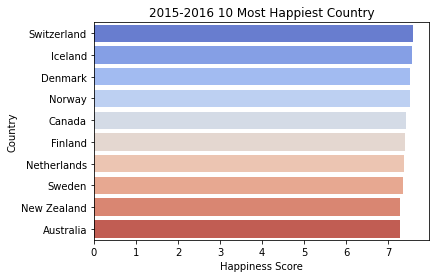

In [612]:
sns.barplot(y = data2015_2016["Country"][:10], x = data2015_2016["Happiness Score"][:10],palette="coolwarm").set(title='2015-2016 10 Most Happiest Country')

In [613]:
data2016_2017 = pd.concat([data2016,data2017])
data2016_2017

,Country,Region,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year
0,Denmark,Western Europe,7.526,1.441780,0.795040,0.579410,0.444530,0.361710,NaN,2016
1,Switzerland,Western Europe,7.509,1.527330,0.863030,0.585570,0.412030,0.280830,NaN,2016
2,Iceland,Western Europe,7.501,1.426660,0.867330,0.566240,0.149750,0.476780,NaN,2016
3,Norway,Western Europe,7.498,1.577440,0.795790,0.596090,0.357760,0.378950,NaN,2016
4,Finland,Western Europe,7.413,1.405980,0.810910,0.571040,0.410040,0.254920,NaN,2016
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,N/A,3.471,0.368746,0.326425,0.581844,0.455220,0.252756,NaN,2017
151,Syria,N/A,3.462,0.777153,0.500533,0.081539,0.151347,0.493664,NaN,2017
152,Tanzania,N/A,3.349,0.511136,0.364509,0.390018,0.066035,0.354256,NaN,2017
153,Burundi,N/A,2.905,0.091623,0.151611,0.059901,0.084148,0.204435,NaN,2017


[Text(0.5, 1.0, '2016-2017 10 Most Happiest Country')]

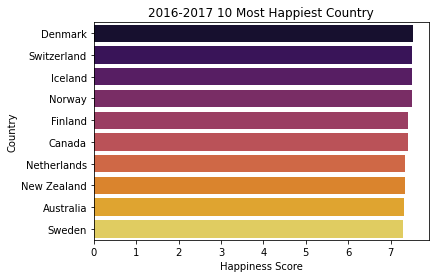

In [614]:
sns.barplot(y = data2016_2017["Country"][:10], x = data2016_2017["Happiness Score"][:10],palette = "inferno").set(title='2016-2017 10 Most Happiest Country')

Text(0.5, 1.0, '2016-2017 10 MOST HAPPIEST COUNTRY')

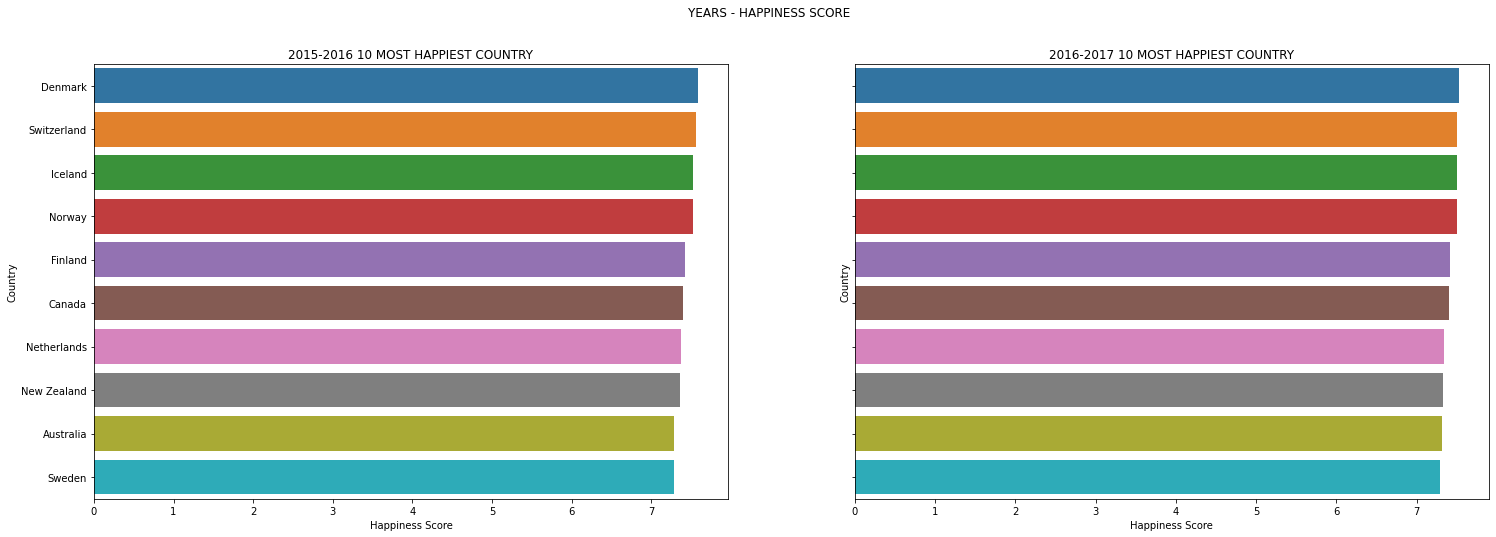

In [615]:
x1 = data2015_2016["Happiness Score"][:10]
y1 = data2015_2016["Country"][:10]


x2 = data2016_2017["Happiness Score"][:10]
y2 = data2016_2017["Country"][:10]

fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('YEARS - HAPPINESS SCORE')

sns.barplot(ax=axes[0], x=x1, y=y1)
axes[0].set_title("2015-2016 10 MOST HAPPIEST COUNTRY")

sns.barplot(ax=axes[1], x=x2, y=y2)
axes[1].set_title("2016-2017 10 MOST HAPPIEST COUNTRY")


In [616]:
data2015 = data2015.iloc[:10,:]
data2016 = data2016.iloc[:10,:]
data2017 = data2017.iloc[:10,:]



trace1 = go.Scatter(x = data2015['Country'],
                    y = data2015['Happiness Score'],
                    mode = "lines+markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    text= data2015.Country)

# Creating trace2
trace2 = go.Scatter(x = data2015['Country'],
                    y = data2016['Happiness Score'],
                    mode = "lines+markers",
                    name = "2016",
                    marker = dict(color = 'blue'),
                    text= data2015.Country)

# Creating trace3
trace3 = go.Scatter(x = data2015['Country'],
                    y = data2017['Happiness Score'],
                    mode = "lines+markers",
                    name = "2017",
                    marker = dict(color = 'green'),
                    text= data2015.Country)

data = [trace1, trace2, trace3]
layout = dict(title = 'Happiness Score of top 10 Countries from 2015 to 2017',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness Score',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )

fig = dict(data = data, layout = layout)
iplot(fig)

# Happiness Score According to Factors

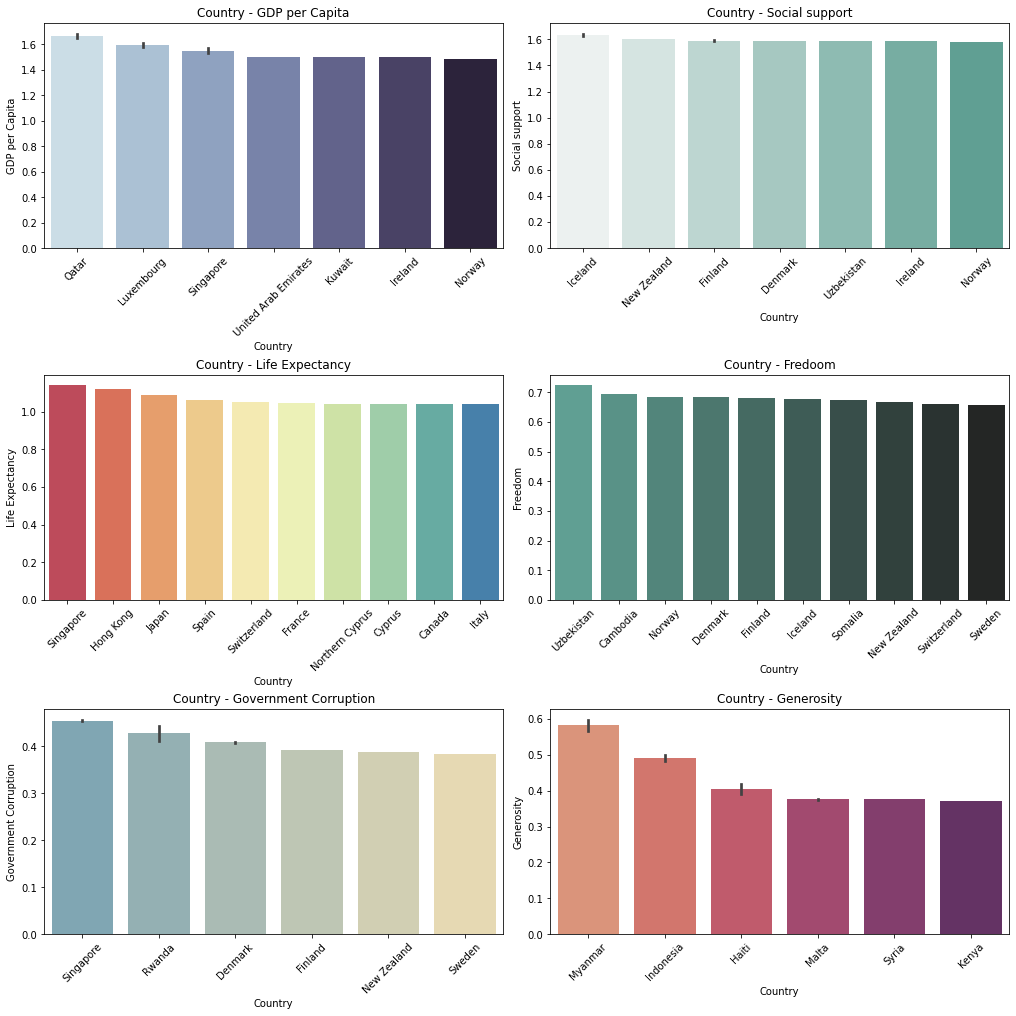

In [617]:
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

sort_eco = alldata.sort_values(by = ['GDP per Capita'], ascending = False)
sort_eco = sort_eco.head(10)
sort_fa = alldata.sort_values(by = ['Social support'], ascending = False)
sort_fa = sort_fa.head(10)
sort_he = alldata.sort_values(by = ['Life Expectancy'], ascending = False)
sort_he = sort_he.head(10)
sort_free = alldata.sort_values(by = ['Freedom'], ascending = False)
sort_free = sort_free.head(10)
sort_gc = alldata.sort_values(by = ['Government Corruption'], ascending = False)
sort_gc = sort_gc.head(10)
sort_genero = alldata.sort_values(by = ['Generosity'], ascending = False)
sort_genero = sort_genero.head(10)

ax=sns.barplot(x="Country", y="GDP per Capita", data=sort_eco, ax = axs[0, 0],palette = "ch:s=.25,rot=-.25")
ax.tick_params(axis = 'x', rotation = 45)
ax.title.set_text('Country - GDP per Capita')

ax=sns.barplot(x="Country",y="Social support", data=sort_fa, ax = axs[0, 1],palette = "light:#5A9")
ax.tick_params(axis = 'x', rotation = 45)
ax.title.set_text("Country - Social support" )

ax=sns.barplot(x="Country",y="Life Expectancy", data=sort_he, ax = axs[1, 0],palette = "Spectral")
ax.tick_params(axis = 'x', rotation = 45)
ax.title.set_text("Country - Life Expectancy" )

ax=sns.barplot(x="Country",y="Freedom", data=sort_free, ax = axs[1, 1],palette = "dark:#5A9_r")
ax.tick_params(axis = 'x', rotation = 45)
ax.title.set_text("Country - Fredoom" )

ax=sns.barplot(x="Country",y="Government Corruption", data = sort_gc, ax = axs[2, 0],palette = "blend:#7AB,#EDA")
ax.tick_params(axis = 'x', rotation = 45)
ax.title.set_text("Country - Government Corruption" )

ax=sns.barplot(x="Country",y="Generosity", data=sort_genero, ax = axs[2, 1] ,palette = "flare")
ax.tick_params(axis = 'x', rotation = 45)
ax.title.set_text("Country - Generosity" )


In [618]:
cols = [ "Life Expectancy", "Social support",
       "GDP per Capita", "Freedom", "Generosity","Government Corruption"]                                           
nrows = 3 
ncols = 2
                                                     
fig = make_subplots(rows=nrows, cols=ncols,subplot_titles=cols)
print('Correlations:')
for index,col in enumerate(cols):
    fig.add_trace(go.Scatter(x=alldata[col], y=alldata['Happiness Score'],mode='markers',
                            customdata = alldata['Country'],
                            hovertemplate="<br>".join(["Index: %{x}",
                                                       "Score: %{y}",
                                                       "Country: %{customdata}"])),      
                  row=index//ncols+1, col=(index%ncols)+1)
    corr = alldata['Happiness Score'].corr(alldata[col])
    print('{}: {:.2}'.format(col,corr))
    
fig.update_layout(height=900, width=800, title_text="Happiness Score And Factors")

fig.show()

Correlations:
Life Expectancy: 0.76
Social support: 0.77
GDP per Capita: 0.8
Freedom: 0.55
Generosity: 0.11
Government Corruption: 0.4


# Model

In [619]:
alldata.head(2)

,Country,Region,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption,Generosity,Social support,Year,Value_Count_Column
0,Finland,N/A,7.632,1.305,0.874,0.681,0.393,0.202,1.592,2018,2
1,Norway,N/A,7.594,1.456,0.861,0.686,0.340,0.286,1.582,2018,2


In [620]:
X = alldata[['GDP per Capita', 'Life Expectancy',
       'Social support', 'Freedom', 'Government Corruption',
       'Generosity']
      ]
y = alldata['Happiness Score']

In [626]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

# Linear Regresion

In [627]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.8167947234529224

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators = 10, random_state = 32)
regressor_forest.fit(X_train, y_train)
regressor_forest.score(X_test,y_test)